In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df = pd.read_csv(r'C:\Users\Lore\12.2020ProiectCursDA\6 Covid Economies\df.csv', index_col = False)

In [7]:
path = r'C:\Users\Lore\12.2020ProiectCursDA'

In [8]:
path

'C:\\Users\\Lore\\12.2020ProiectCursDA'

In [10]:
#Q3
df.columns

Index(['Unnamed: 0', 'CODE', 'COUNTRY', 'CITY', 'CONTINENT', 'EU', 'DATE',
       'HDI', 'TC', 'TD', 'STI', 'Population', 'GDPCAP'],
      dtype='object')

In [11]:
df.drop(["Unnamed: 0"], axis=1, inplace = True)

In [12]:
df.head()

,CODE,COUNTRY,CITY,CONTINENT,EU,DATE,HDI,TC,TD,STI,Population,GDPCAP
0,AFG,Afghanistan,Kabul,Asia,No,12/31/2019,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,Kabul,Asia,No,1/1/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,Kabul,Asia,No,1/2/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,Kabul,Asia,No,1/3/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,Kabul,Asia,No,1/4/2020,0.498,0.0,0.0,0.0,17.477233,7.497754


In [13]:
df.shape

(49991, 12)

In [14]:
# Check for missing values
df.isnull().sum()

CODE          0
COUNTRY       0
CITY          0
CONTINENT     0
EU            0
DATE          0
HDI           0
TC            0
TD            0
STI           0
Population    0
GDPCAP        0
dtype: int64

No missing values to handle

In [15]:
#Duplicates check
dups = df.duplicated()

In [16]:
dups

0        False
1        False
2        False
3        False
4        False
         ...  
49986    False
49987    False
49988    False
49989    False
49990    False
Length: 49991, dtype: bool

In [17]:
dups.shape

(49991,)

No duplicates

#Extreme values checks

C:\Users\Lore\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Population', ylabel='Density'>

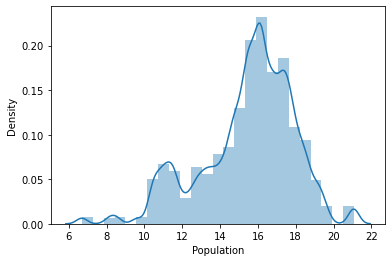

In [55]:
sns.distplot(df['Population'], bins=25) 

In [56]:
df['Population'].mean() # Check the mean

15.484867820723176

In [57]:
df['Population'].median() # Check the median

15.97360361

In [58]:
df['Population'].max() # Check the max

21.08743924

In [ ]:
#Q4 Data prep for regression analysis

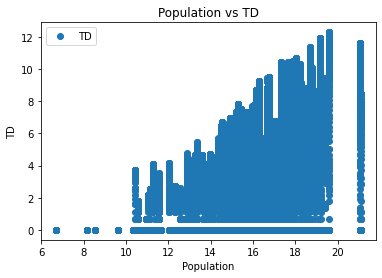

In [59]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Population', y='TD',style='o') 
plt.title('Population vs TD')  
plt.xlabel('Population')  
plt.ylabel('TD')  
plt.show()

#Q5
The larger the population, the higher the total number of deaths. They are directly connected. The hypothesis is verified.  

In [60]:
#Q6 Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Population'].values.reshape(-1,1)
y = df['TD'].values.reshape(-1,1)

In [61]:
X

array([[17.4772331 ],
       [17.4772331 ],
       [17.4772331 ],
       ...,
       [16.51438055],
       [16.51438055],
       [16.51438055]])

In [62]:
y

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [5.44241771],
       [5.44241771],
       [5.44241771]])

In [63]:
#Q7 Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [64]:
#Q8
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [65]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [66]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

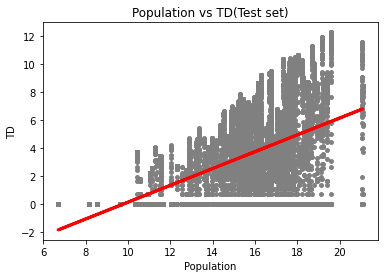

In [67]:
#Q9 Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Population vs TD(Test set)')
plot_test.xlabel('Population')
plot_test.ylabel('TD')
plot_test.show()

#Q10
The line fit the data. The line can start from 0, not -2.

In [68]:
#Q11 Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [69]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.60221017]]
Mean squared error:  7.263076607296112
R2 score:  0.23908487647874566


In [70]:
y_predicted

array([[4.12041057],
       [3.7239489 ],
       [5.6516368 ],
       ...,
       [5.80349401],
       [3.17414811],
       [3.44218996]])

In [71]:
#Q12 Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.000000,4.120411
1,5.758902,3.723949
2,0.000000,5.651637
3,4.234107,4.343278
4,5.755742,3.835852
5,0.000000,1.403610
6,0.000000,-0.104766
7,0.693147,2.955642
8,0.000000,3.061493
9,3.367296,3.966680


In [72]:
#Compare how the regression fits the training set

In [73]:
# Predict
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [74]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [75]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.60221017]]
Mean squared error:  7.3431621963205265
R2 score:  0.22890810380131577


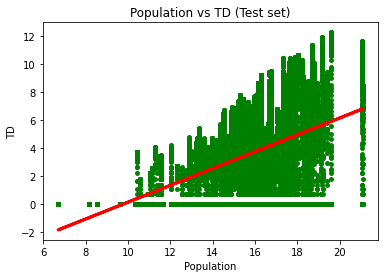

In [76]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Population vs TD (Test set)')
plot_test.xlabel('Population')
plot_test.ylabel('TD')
plot_test.show()

#Q13
Is big differences between actual data and predicted data. 
Maybe the TD (total deaths) is a variable that not fit for this test.